# TransJakarta Passengers 2021

## 1. Latar Belakang (Background)

PT Transportasi Jakarta adalah perusahaan dari Indonesia yang menyediakan layanan transportasi darat bernama **TransJakarta**.
TransJakarta adalah sebuah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan yang beroperasi sejak tahun 2004 di Jakarta. Sebagai perusahaan penyedia moda transportasi massal untuk mendukung aktivitas di ibukota Indonesia yang sangat padat, perusahaan berusaha untuk terus meningkatkan layanan kepada masyarakat sehingga, terkhususnya dari segi jenis kendaraan, trayek, dan jumlah penumpang.

## 2. Pernyataan Masalah (Problem Statement)

PT Transportasi Jakarta ingin mengetahui apakah jumlah kendaraan yang disediakan dan apakah trayek (rute lintasan) 
yang dibuat telah sesuai dengan kebutuhan penumpang. Informasi ini akan memberikan _insight_ (wawasan) terkait ketersediaan 
jenis kendaraan dan trayek yang ada di lapangan sehingga perusahaan dapat mengambil langkah yang tepat untuk melakukan 
alokasi jenis kendaraan dan penentuan trayek dalam mengakomodasi kebutuhan penumpang.

Sebagai Data Analyst, kita akan mencoba untuk membantu menjawab pertanyaan berikut ini:

**Seperti apa proporsi jenis kendaraan TransJakarta, trayek, dan jumlah penumpang yang ada sepanjang tahun 2021?**

## 3. Import Data

Kita membutuhkan data sebagai bahan yang akan kita olah untuk membantu kita menjawab pertanyaan di bagian Problem Statement.
Dataset yang digunakan adalah data history yang dikumpulkan pada tahun 2021 di mana dataset tersebut dapat diunduh [di sini](https://drive.google.com/drive/folders/1L2BIjpuegENmJfiu4lZ4CcjJhZdFo_8x) (nama file 'TransJakarta Passengers 2021.csv').

In [548]:
# Melakukan import data di 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

sns.set(rc={"figure.figsize" : (10, 5)}) # Menentukan ukuran graphic atau chart secara keseluruhan 

Dapat kita lihat, dataset terdiri dari 6 kolom yang nantinya akan dipakai dalam pengolahan data:
1. tahun = hanya terisi 1 jenis data, yakni 2021 karena data ini adalah data yang diperoleh pihak TransJakarta di tahun 2021
2. bulan = terdiri dari angka 1-10 yang mewakili 12 bulan kalender (Januari-Desember)
3. jenis = jenis dari kendaraan yang disediakan oleh pihak TransJakarta
4. kode_trayek = kode dari trayek yang disediakan oleh pihak TransJakarta
5. trayek = nama dari trayek atau rute lintasan yang disediakan oleh pihak TransJakarta
6. jumlah penumpang = jumlah penummpang yang menggunakan jasa transportasi TransJakarta

Dataset terdiri dari ribuan baris. Di bawah ini adalah 5 baris teratas dan 5 baris terbawah dari dataset 'TransJakarta Passengers 2021' 

In [549]:
tj = pd.read_csv('TransJakarta Passengers 2021.csv')
display(tj.head(), tj.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


## 4. Data Understanding and Cleaning 

Sebagai langkah awal sebelum kita dapat melakukan analisis data, kita perlu mengidentifikasi dataset yang ada atau disebut dengan tahapann _data understanding_. Melalui proses _data understanding_ kita dapat melihat apa saja anomali yang terdapat pada dataset, misalkan adanya _missing value_. Apabila kita sudah mengidentifikasi anomali pada data, kita dapat melakukan proses _data cleansing_ sehingga dataset yang akan kita gunakan dalam proses _data analysis_ sudah bersih dan dapat mengurangi kesalahan atau bias dalam proses analisis.

Mari kita lihat informasi dataset 'TransJakarta Passengers 2021' secara keseluruhan.

In [550]:
# Melihat info secara keseluruhan pada dataset
print('Jumlah baris dan kolom di dataset df adalah', tj.shape)
tj.info()

Jumlah baris dan kolom di dataset df adalah (1473, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [551]:
# Menunjukkan statistik data secara keseluruhan
display(tj.describe(), tj.describe(include='object'))

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


In [569]:
pd.set_option('display.max_colwidth', None)
# Data unik di tiap kolom
listofItem = []
for c in tj.columns:
    listofItem.append([c, tj[c].nunique(), tj[c].unique()])

tabelofunique = pd.DataFrame(columns=['Column Name', 'Number of Unique Items', 'Unique Items'],
                     data=listofItem)
tabelofunique

,Column Name,Number of Unique Items,Unique Items
0,tahun,1,[2021]
1,bulan,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923, 71096, 46177, 41534, 63975, 46304, 59214, 64162, 32715, 69978, 51615, 79962, 60715, 133054, 117647, 62587, 51771, 43232,

Dari informasi di atas, secara umum kita dapat melihat bahwa:
* dataset 'TransJakarta Passengers 2021' memiliki 1473 baris dan 6 kolom
* kolom 'jenis' adalah satu-satunya kolom yang yang memiliki data kosong karena jumlah data (count) < jumlah baris
* kolom 'tahun' tidak relevan untuk digunakan karena hanya berisi satu data unik, yakni 2021
* hanya terdapat 3 jenis kendaraan yang disediakan TransJakarta, yakni Mikrotrans, BRT, dan Angkutan Umum Integrasi
* terdapat 136 data unik 'trayek' dan 135 data unik 'kode_trayek', namun untuk kepentingan analisis kita bisa menggunakan kolom 'trayek' saja

### a) Data Kosong (Missing Value)

Kita akan mengecek terlebih dahulu seberapa banyak _missing value_ yang terdapat di setiap kolom dan persebarannya di dalam data menggunakan Heatmap.

In [553]:
# Persentase missing value di tiap kolom
(tj.isna().sum()/tj.shape[0])*100

tahun               0.000000
bulan               0.000000
jenis               0.000000
kode_trayek         0.000000
trayek              0.135777
jumlah_penumpang    0.000000
dtype: float64

<Axes: >

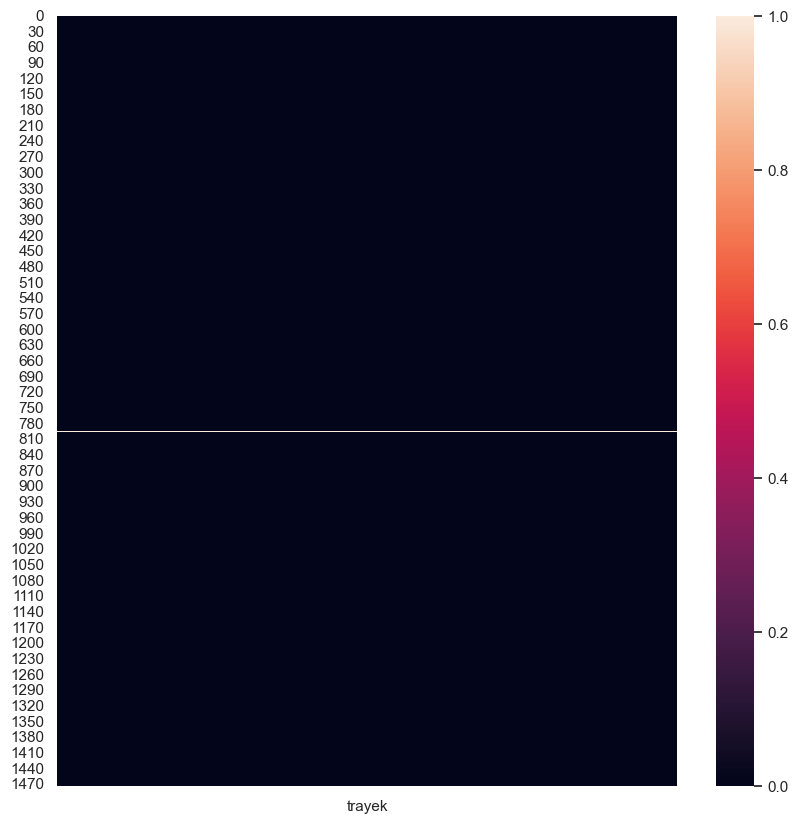

In [554]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(tj[['trayek']].isna())

In [555]:
# Jumlah data kosong missing value di kolom 'trayek'
tj[['trayek']].isna().sum()

trayek    2
dtype: int64

Dari proses di atas, _missing value_ hanya terdapat di kolom 'trayek' sebanyak 2 data (persentase data kosong = 13.5%). 
Ada 2 cara untuk menangani _missing value_ di kolom 'trayek':
1. Menghapus baris yang memiliki _missing value_. Cara ini termasuk aman dijalankan pada proses kali ini karena hanya sedikit sekali jumlah data yang kosong, yakni hanya 2 baris dari total 1473 baris.
2. Mengisi _missing value_ dengan data yang relevan. Proses ini lebih baik dipilih karena tidak mengurangi jumlah sample atau data yang akan diolah. _Missing value_ bisa diisi dengan data yang paling mendekati dengan nilai aslinya berdasarkan data dari kolom yang berhubungan.

Data pada kolom 'trayek' memiliki hubungan dengan data di kolom 'kode_trayek' karena terlihat jelas bahwa semua trayek atau 
rute lintasan TransJakarta diberikan kode oleh pihak perusahaan untuk mempermudah penyimpanan dan pencarian data di database perusahaan. 

In [556]:
# Data 'kode_trayek' dimana kolom 'trayek' memiliki data kosong atau missing value
display(tj[tj['trayek'].isna()]['kode_trayek'])

795    JAK.10B
796    JAK.10A
Name: kode_trayek, dtype: object

In [557]:
# Memfilter tampilan data berdasarkan data 'kode_trayek' di mana 'trayek' = NaN 
tj[tj['kode_trayek'].str.contains('|'.join(['JAK.10A','JAK.10B']))]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
304,2021,3,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828
305,2021,3,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,16781
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992
1159,2021,7,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,19060
1404,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008
1405,2021,11,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,30703


Melalui proses di atas, kita bisa melihat bahwa data 'trayek' yang kosong memiliki 'kode_trayek' bernama **JAK.10A** dan **JAK.10B**. Di baris _non-missing value_ dapat kita lihat bahwa kode JAK.10A memiliki nama trayek **Gondangdia - Cikini via Salemba Raya** dan kode JAK.10B memiliki nama trayek **Gondangdia - Cikini via Kramat Raya**. Maka, kita dapat mengisi data 'trayek' yang kosong dengan kedua nama trayek tersebut.

In [558]:
# Mengisi data kosong pada 'trayek' berdasarkan data yang sama pada 'kode_trayek = JAK.10A' 
tj.loc[(tj['trayek'].isna()) & (tj['kode_trayek'] == 'JAK.10A'), ['trayek']] = 'Gondangdia - Cikini via Salemba Raya'

In [559]:
# Mengisi data kosong pada 'trayek' berdasarkan data yang sama pada 'kode_trayek = JAK.10B' 
tj.loc[(tj['trayek'].isna()) & (tj['kode_trayek'] == 'JAK.10B'), ['trayek']] = 'Gondangdia - Cikini via Kramat Raya'

In [560]:
# Pengecekkan ulang data kosong
tj[['trayek']].isna().sum()

trayek    0
dtype: int64

Setelah mengisi data yang kosong pada kolom 'trayek', kita bisa mengecek kembali dan memastikan bahwa tidak ada lagi _missing value_ di kolom 'trayek'. 

### b) Data Hasil Cleansing (Data Bersih)

In [561]:
listofItem = []
for c in tj.columns :
    listofItem.append([c, tj[c].dtype, tj[c].isna().sum(),
                    tj[c].nunique(), list(tj[c].drop_duplicates().sample(1).values)]);

tjSum = pd.DataFrame(columns=['Data_Feature', 'Data_Type', 'Null', 'Number_of_Unique', 'Unique_Sample'],
                     data=listofItem)
print(tj.shape)
tjSum

(1473, 6)


,Data_Feature,Data_Type,Null,Number_of_Unique,Unique_Sample
0,tahun,int64,0,1,[2021]
1,bulan,int64,0,12,[12]
2,jenis,object,0,3,[Mikrotrans]
3,kode_trayek,object,0,135,[JAK.01]
4,trayek,object,0,136,[Ragunan - Departemen Pertanian]
5,jumlah_penumpang,int64,0,1420,[61989]


In [564]:
tj

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


In [565]:
# Mengekspor data yang sudah bersih ke csv
tj.to_csv('TransJakarta Passengers 2021_Clean.csv', index = False)

Dapat kita lihat pada tampilan di atas, dataset sudah bersih dan siap digunakan untuk proses analisis data. 
Tidak ada perubahan jumlah baris dan kolom sebelum dan sesudah proses data cleansing karena tidak ada penghapusan data kosong.

Data yang sudah bersih ini diekspor ke _local drive_ dengan format csv agar dapat digunakan untuk visualisasi data menggunakan Tableau.

## 5. Data Analysis

Setelah melewati tahap data cleansing, maka kita bisa melakukan analisis untuk mencari jawaban **Seperti apa proporsi jenis kendaraan TransJakarta, trayek, dan jumlah penumpang sepanjang tahun 2021**.

Analisis akan dilakukan dengan membandingkan data antara jenis kendaraan dan trayek dengan jumlah pennumpang. di mana juga akan dilihat bagaimana trend yang terjadi setiap bulannya.

### a) Trend Jumlah Penumpang pada Tahun 2021

Pertama-tama kita akan melihat trend jumlah penumpang yang terjadi di tahun 2021 seperti di bawah ini.

In [178]:
# Mengelompokkan jumlah penumpang per bulan sepanjang tahun 2021
penumpang_by_month = tj[['jumlah_penumpang', 'bulan']].groupby(['bulan'], as_index=False).sum()
penumpang_by_month

,bulan,jumlah_penumpang
0,1,9797366
1,2,9381499
2,3,11595008
3,4,11624614
4,5,10823336
5,6,11046655
6,7,6583105
7,8,6498228
8,9,8531507
9,10,10666259


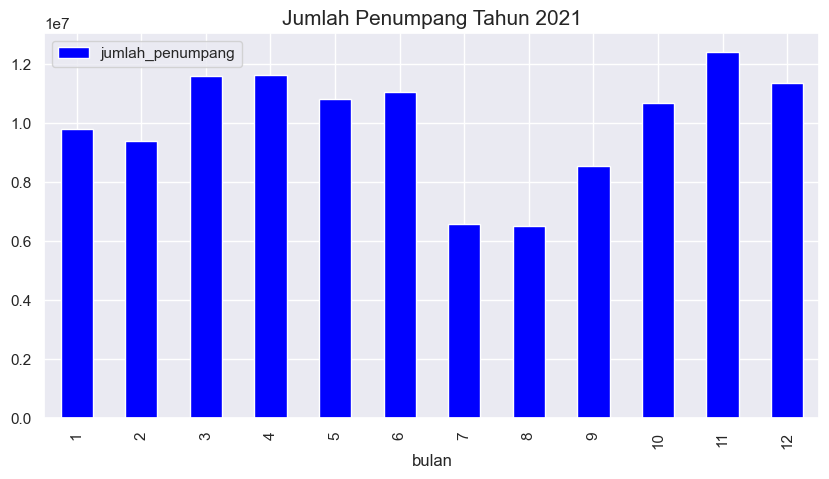

In [335]:
# Jumlah penumpang TransJakarta tahun 2021
penumpang_by_month.plot.bar(x='bulan', y='jumlah_penumpang', color='blue')
plt.title('Jumlah Penumpang Tahun 2021', size=15)
plt.savefig('Jumlah Penumpang Tahun 2021.png')
plt.show()

Dari grafik bar plot di atas, terlihat bahwa jumlah penumpang mengalami trend yang naik turun sepanjang tahun 2021. 
Jumlah penumpang TransJakarta paling banyak ada di bulan November (12.418.444 orang) dan paling sedikit ada di bulan Juli (6.583.105 orang) dan Agustus (6.498.228 orang).

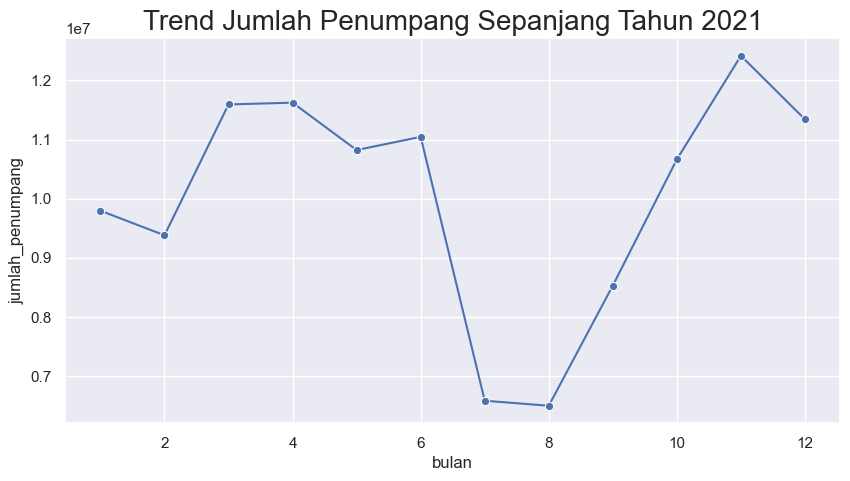

In [357]:
# Trend Jumlah Penumpang TransJakarta Sepanjang Tahun 2021
sns.lineplot(data=tj, x='bulan', y='jumlah_penumpang', estimator=np.sum, errorbar=None, marker="o")
plt.title('Trend Jumlah Penumpang Sepanjang Tahun 2021', size = 20)
plt.savefig('Trend Jumlah Penumpang 2021.png')
plt.show()

Pada tahun 2021, seluruh dunia masih mengalami pandemi COVID-19. Pemberlakuan Pembatasan Kegiatan Masyarakat (PPKM) dimandatkan oleh pemerintah, di mana PPKM level 4 (level yang paling tinggi) diberlakukan di daerah kota-kota besar di Indonesia, termasuk Jakarta. Bahkan bulan Juli 2021, ada kenaikan kasus COVID-19 sebesar 350% di Indonesia (sumber data klik [di sini](https://databoks.katadata.co.id/datapublish/2021/08/06/kematian-covid-19-indonesia-naik-hampir-350-pada-juli-2021)), di mana DKI Jakarta menjadi salah satu provinsi yang mendominasi kasus kematian akibat COVID-19. Oleh karena itu, banyak orang yang memutuskan untuk tinggal di rumah dan sebisa mungkin membatasi diri untuk berkativitas di luar, sehingga ini mempengaruhi penurunan jumlah penumpang TransJakarta di bulan Juli-Agustus 2021.

Selain itu, dari trend yang kita lihat di atas, jumlah penumpang TransJakarta kembali naik perlahan-lahan mulai dari bulan September hingga mencapai puncaknya di bulan November. Setelah 2 bulan mengurangi aktivitas di luar, akhirnya penduduk Jakarta secara bertahap mulai melakukan aktivitas di luar kembali, terutama para pekerja yang sebelumnya sempat wfh (_working from home_).

### b) Komposisi Jenis Angkutan TransJakarta 

Mari kita lihat komposisi jenis angkutan yang dimiliki dan dijalankan oleh TransJakarta.

In [264]:
# Komposisi jenis angkutan TransJakarta yang beroperasi selama tahun 2021
jenis_tj = tj['jenis'].value_counts(ascending=False)
jenis_tj

Mikrotrans                 848
Angkutan Umum Integrasi    469
BRT                        156
Name: jenis, dtype: int64

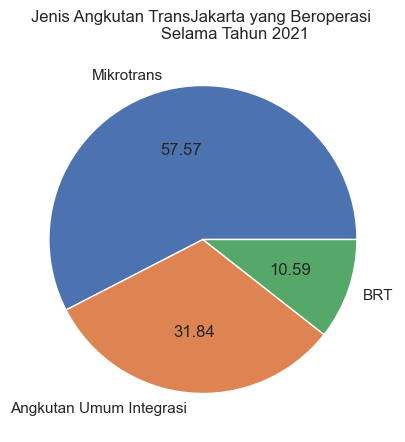

In [337]:
jenis_tj.plot(kind='pie', 
              ylabel='', 
              autopct='%.2f', 
              title = '''Jenis Angkutan TransJakarta yang Beroperasi 
              Selama Tahun 2021'''
              )
plt.savefig('Jenis TransJakarta yang Beroperasi.png')

Berdasarkan pie chart di atas, bisa terlihat bahwa mikrotrans adalah jenis kendaraan terbanyak yang dimiliki oleh TransJakarta, yakni sebesar 57,57%. BRT berjumlah paling sedikit, yakni hanya 10,59%. 

Kita harus menelaah lebih jauh terkait data ini. BRT berjumlah paling sedikit, namun **apakah BRT menampung penumpang paling sedikit dan memiliki trayek paling sedikit juga?**

### c) Jumlah Penumpang TransJakarta Berdasarkan Jenis Angkutan

Di bawah ini, kita akan melihat perbandingan antara jenis kendaraan dengan jumlah penumpang yang dibawa pada tahun 2021.

In [304]:
# Jumlah penumpang TransJakarta berdasarkan jenis angkutan
penumpang_by_jenis = tj[['jumlah_penumpang', 'jenis']].groupby(['jenis'], as_index=False).sum()
penumpang_by_jenis

,jenis,jumlah_penumpang
0,Angkutan Umum Integrasi,11281390
1,BRT,59111356
2,Mikrotrans,49915801


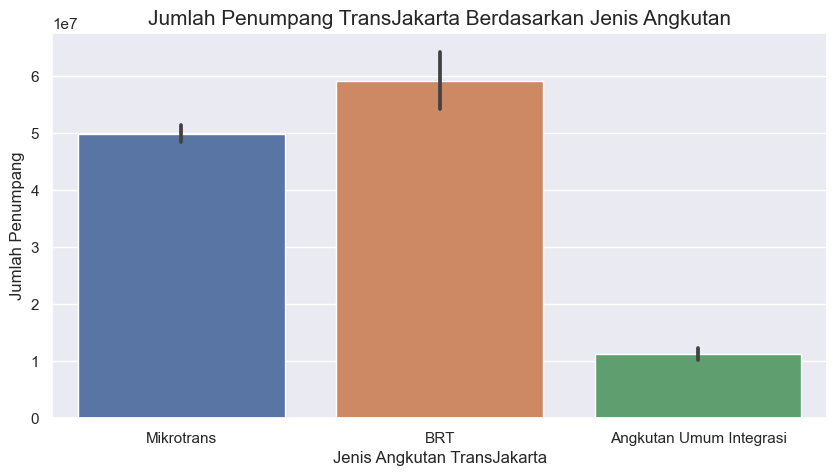

In [371]:
sns.barplot(data=tj, x='jenis', y='jumlah_penumpang', estimator=np.sum)
plt.title('Jumlah Penumpang TransJakarta Berdasarkan Jenis Angkutan', size = 15)
plt.xlabel('Jenis Angkutan TransJakarta')
plt.ylabel('Jumlah Penumpang')
plt.savefig('Jumlah Penumpang Berdasarkan Jenis Angkutan.png')
plt.show()

Bar plot di atas menunjukkan bahwa jenis angkutan BRT menampung jumlah penumpang paling banyak dibandingkan jenis angkutan lainnya, yakni sebanyak 59.111.356 orang. Angkutan umum integrasi hanya membawa total 11.281.390 orang. 

Padahal dari data jenis angkutan yang beroperasi, BRT memiliki jumlah paling sedikit. Artinya, kapasitas yang dimiliki BRT lebih besar dibandingkan dengan jenis angkutan lainnnya dan kemungkinan trayeknya pun adalah trayek yang ramai penumpang. Hal ini akan kita lihat di visualisasi data selanjutnya.

### d) Trend Jumlah Penumpang Berdasarkan Jenis Angkutan

Kita juga akan melihat trend jumlah penumpang per bulannya berdasarkan jenis angkutan.

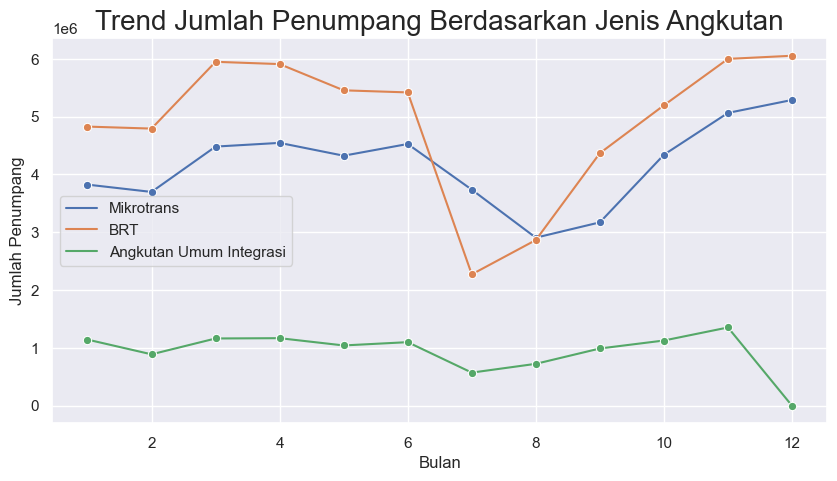

In [370]:
sns.lineplot(data=tj, x='bulan', y='jumlah_penumpang', hue='jenis', estimator=np.sum, errorbar=None, marker="o")

plt.title('Trend Jumlah Penumpang Berdasarkan Jenis Angkutan', size = 20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.legend(loc=0)
plt.savefig('Trend Berdasarkan Jenis Angkutan.png')
plt.show()

Bila dilihat dari line plot di atas, maka dapat disimpulkan bahwa trend jumlah penumpang per bulannya berdasarkan jenis angkutan juga mengalami naik turun mirip seperti yang kita lihat pada trend jumlah penumpang secara keseluruhan. Bulan Juli dan Agustus menjadi bulan dengan jumlah penumpang terendah di semua jenis angkutan yang disebabkan oleh meningkatnya kasus COVID-19 di pertengahan tahun. Perbedaannya dapat kita lihat di bulan 12 (Desember), di mana jumlah penumpang mikrotrans dan BRT mengalami kenaikan, namun jumlah penumpang angkutan umum integrasi malah menurun.

Mari kita lihat apakah median jumlah penumpang to setiap jenis angkutan sama atau setidaknya ada yang memiliki perbedaan yang signifikan.

In [589]:
# Menghitung median jumlah penumpang tiap jenis angkutan
for i in tj['jenis'].unique():
    print('Median penumpang bulanan {}: {}'.format(i, tj[tj['jenis'] == i]['jumlah_penumpang'].median()))

Median penumpang bulanan Mikrotrans: 55168.5
Median penumpang bulanan BRT: 357060.0
Median penumpang bulanan Angkutan Umum Integrasi: 17270.0


In [590]:
# Menghitung Median total jumlah penumpang tiap bulan
print('Median total penumpang bulanan:', tj['jumlah_penumpang'].median())

Median total penumpang bulanan: 49628.0


**Hypothesis**<br>
Ho: Median penumpang bulanan mikrotrans = median penumpang bulanan BRT = median penumpang bulanan angkutan umum integrasi<br>
Ha: Setidaknya ada satu pasang yang tidak sama (dan kita tidak tahu yang mana)

In [591]:
# Uji statistik dengan Kruskal Wallis Test
from scipy.stats import kruskal

kruskal(tj[tj['jenis'] == 'Mikrotrans']['jumlah_penumpang'],
        tj[tj['jenis'] == 'BRT']['jumlah_penumpang'],
        tj[tj['jenis'] == 'Angkutan Umum Integrasi']['jumlah_penumpang']
       )

KruskalResult(statistic=772.0395313462573, pvalue=2.2581139960736734e-168)

Kesimpulan dari hasil Kruskal Wallis Test di atas adalah p_value > tingkat signifikansi 0.05, maka Ha akan diterima sehingga membuktikan bahwa median jumlah penumpang dari tiap jenis angkutan tidaklah sama.

### e) Trayek dengan Jumlah Penumpang Terbesar dan Terkecil

Kita bisa mencoba untuk melihat trayek mana yang paling banyak jumlah penumpangnya menggunakan bar plot sehingga kita tahu mana rute terpadat TransJakarta dan yang paling butuh banyak armada angkutan.

Di bawah ini adalah 10 trayek dengan jumlah penumpang terbanyak.

In [403]:
penumpang_by_trayek = tj[['jumlah_penumpang', 'trayek']].groupby(['trayek'], as_index=False).sum()
penumpang_by_trayek_desc = penumpang_by_trayek.sort_values(['jumlah_penumpang', 'trayek'], ascending=False).head(10)
penumpang_by_trayek_desc

,trayek,jumlah_penumpang
5,Blok M - Kota,10079752
75,Pinang Ranti - Pluit,7694406
34,Kalideres - Pasar Baru,5250726
59,Lebak Bulus - Harmoni,5122397
37,Kampung Melayu - Ancol,4902814
46,Kampung Rambutan - Kampung Melayu,4372447
125,Tanjung Priok - PGC 2,4262272
90,Ragunan - Dukuh Atas 2,3996604
81,Pulo Gadung 1 - Harmoni,3836531
11,Ciledug - Tendean,3337261


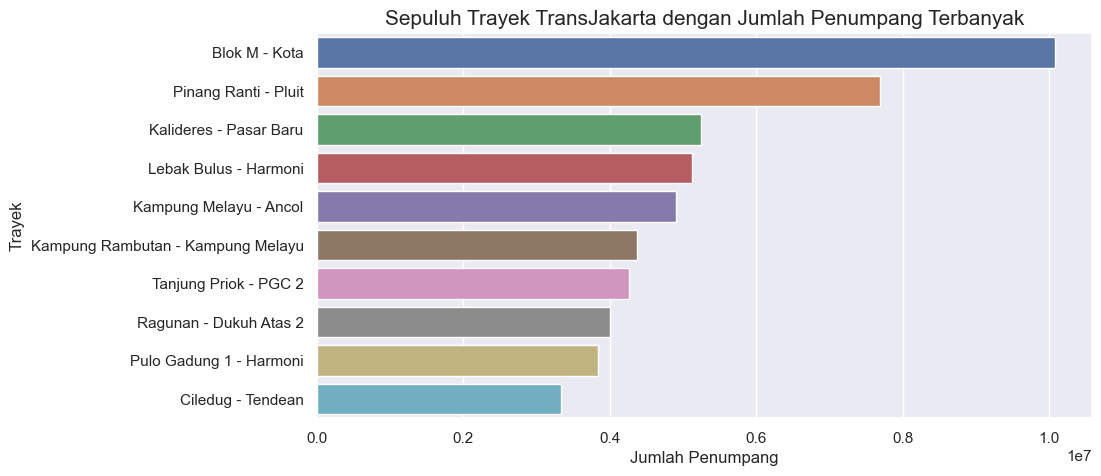

In [579]:
sns.barplot(data=penumpang_by_trayek_desc, x='jumlah_penumpang', y='trayek', estimator=np.sum)
plt.title('Sepuluh Trayek TransJakarta dengan Jumlah Penumpang Terbanyak', size = 15)
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Trayek')
plt.show()

Bisa dilihat dari data di atas, 10 trayek atau rute TransJakarta dengan jumlah penumpang paling banyak adalah:
1. Blok M - Kota = 10.079.752 penumpang
2. Pinang Ranti - Pluit = 7.694.406 penumpang
3. Kalideres - Pasar Baru = 5.250.726 penumpang
4. Lebak Bulus - Harmoni = 5.122.397 penumpang
5. Kampung Melayu - Ancol = 4.902.814 penumpang
6. Kampung Rambutan - Kampung Melayu = 4.372.447 penumpang
7. Tanjung Priok - PGC 2 = 4.262.272 penumpang
8. Ragunan - Dukuh Atas 2 = 3.996.604 penumpang
9. Pulo Gadung 1 - Harmoni = 3.836.531 penumpang
10. Ciledug - Tendean = 3.337.261 penumpang

Bila dicermati, trayek di atas melewati daerah pusat bisnis dan perkantoran di Jakarta sehingga banyak orang naik melalui trayek di atas, yang umumnya untuk berangkat ke tempat kerja dan pulang.

Mari kita coba cari tahu trayek mana yang paling sedikit jumlah penumpangnya di mana trayek tersebut akan butuh lebih sedikit armada angkutan.

Di bawah ini adalah 10 trayek dengan jumlah penumpang paling sedikit.

In [592]:
penumpang_by_trayek_asc = penumpang_by_trayek.sort_values(['jumlah_penumpang', 'trayek'], ascending=True).head(10)
penumpang_by_trayek_asc

,trayek,jumlah_penumpang
114,Taman Kota Intan - Museum Bahari,232
54,Kota Tua Explorer,376
108,Stasiun Manggarai - Ragunan,377
17,Dukuh Atas - Casablanca via Epicentrum Raya,608
89,Ragunan - Departemen Pertanian,1386
71,Pelabuhan Kaliadem - Kota,1463
20,Gondangdia - Cikini via Kramat Jaya,3136
123,Tanah Abang Explorer,3945
21,Gondangdia - Cikini via Kramat Raya,10921
23,Gondangdia - Senen,12812


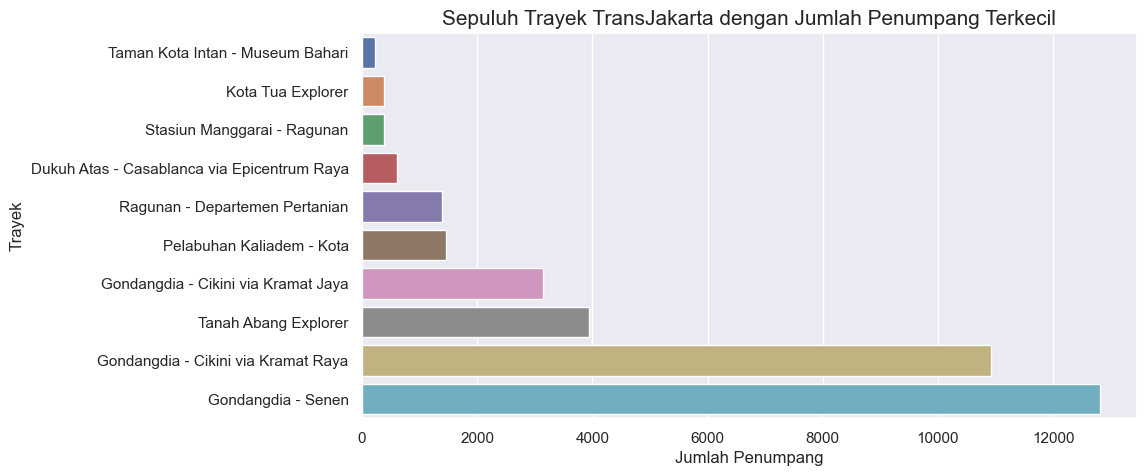

In [408]:
sns.barplot(data=penumpang_by_trayek_asc, x='jumlah_penumpang', y='trayek', estimator=np.sum)
plt.title('Sepuluh Trayek TransJakarta dengan Jumlah Penumpang Terkecil', size = 15)
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Trayek')
plt.show()

Dari data di atas, 10 trayek atau rute TransJakarta dengan jumlah penumpang paling sedikit adalah:

1. Taman Kota Intan - Museum Bahari	= 232 penumpang
2. Kota Tua Explorer = 376 penumpang
3. Stasiun Manggarai - Ragunan = 377 penumpang
4. Dukuh Atas - Casablanca via Epicentrum Raya = 608 penumpang
5. Ragunan - Departemen Pertanian = 1.386 penumpang
6. Pelabuhan Kaliadem - Kota = 1.463 penumpang
7. Gondangdia - Cikini via Kramat Jaya = 3.136 penumpang
8. Tanah Abang Explorer = 3.945 penumpang
9. Gondangdia - Cikini via Kramat Raya = 10.921 penumpang
10. Gondangdia - Senen = 12.812 penumpang

Sebagian besar trayek di atas merupakan rute yang melewati tempat rekreasi dan lebih sedikit terdapat pusat bisnis serta perkantoran sehingga lebih sepi penumpang.

### f) Perbandingan Jenis Angkutan dengan Jumlah Penumpang dan Jumlah Trayek

Untuk analisis yang lebih rinci, mari kita cari tahu bagaimana perbandingan antara jenis angkutan dengan jumlah penumpang dan jumlah trayek. Hal ini bertujuan untuk melihat apakah jumlah trayek yang dilalui suatu jenis angkutan mempengaruhi jumlah penumpang yang didapat.

In [416]:
# Jumlah trayek TransJakarta berdasarkan jenis angkutan
trayek_by_jenis = tj[['trayek', 'jenis']].groupby(['jenis'], as_index=False).count()
trayek_by_jenis

,jenis,trayek
0,Angkutan Umum Integrasi,469
1,BRT,156
2,Mikrotrans,848


In [417]:
# Memeriksa ulang data jumlah penumpang TransJakarta berdasarkan jenis angkutan
penumpang_by_jenis

,jenis,jumlah_penumpang
0,Angkutan Umum Integrasi,11281390
1,BRT,59111356
2,Mikrotrans,49915801


<function matplotlib.pyplot.show(close=None, block=None)>

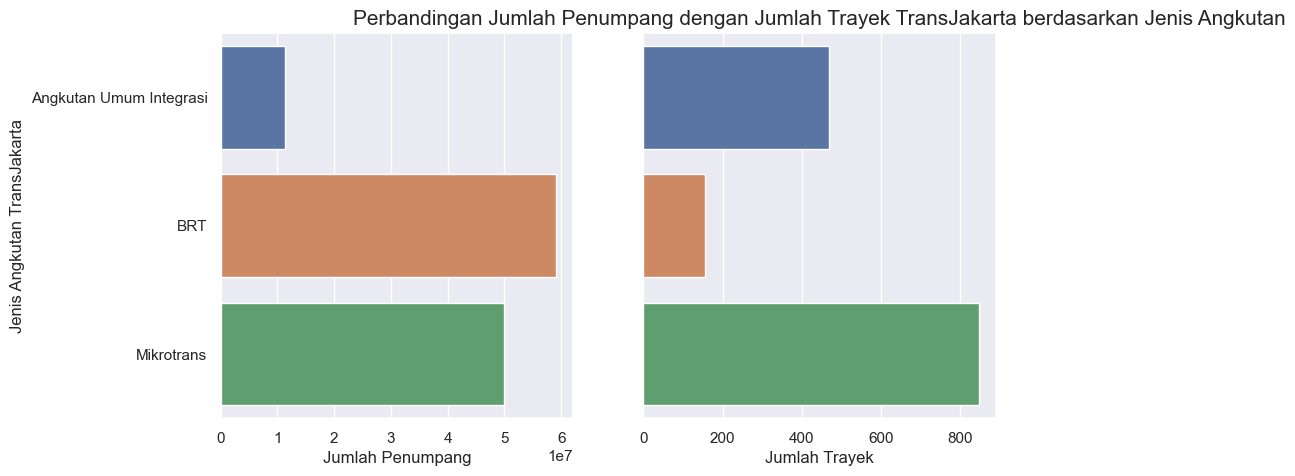

In [481]:
f, axes = plt.subplots(1, 2)

g1 = sns.barplot(data=penumpang_by_jenis, x='jumlah_penumpang', y='jenis', ax=axes[0])
g1.set(xlabel='Jumlah Penumpang')
g1.set(ylabel='Jenis Angkutan TransJakarta')

g2 = sns.barplot(data=trayek_by_jenis, x='trayek', y='jenis', ax=axes[1])
g2.set(xlabel='Jumlah Trayek')
g2.set(ylabel=None)
g2.set(yticklabels=[])

plt.title('Perbandingan Jumlah Penumpang dengan Jumlah Trayek TransJakarta berdasarkan Jenis Angkutan', size = 15)

plt.show

Berdasarkan kedua bar plot di atas, didapati bahwa mikrotrans memiliki trayek paling banyak dan BRT memiliki memiliki trayek paling sedikit, padahal jumlah penumpang BRT paling banyak dibandingkan jenis angkutan TransJakarta lainnya. 
Secara logika, karena BRT mengangkut jumlah penumpang yang lebih banyak, maka jumlah BRT lebih banyak, namun ini malah kebalikannya. Pastinya ada faktor-faktor penyebab mengapa hal ini terjadi.

Selain itu kita bisa mengecek apakah jumlah trayek mempengaruhi jumlah penumpang dengan menggunakan Chi-squared test. Hal ini bertujuan untuk melihat apakah variable jumlah penumpang dan jumlah trayek adalah variabel yang independent atau tidak.

**Hypothesis**<br>
Ho: The two variables are independent<br>
Ha: The two variables are dependent

In [594]:
data_trayek_dan_penumpang = [[469, 156, 848], [11281390, 59111356, 49915801]]
stat, pvalue, dof, expected = chi2_contingency(data_trayek_dan_penumpang)

alpha = 0.05
print('p-value', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak Ho)')
else:
    print('Independent (terima Ho)')

p-value 1.7891800825446292e-289
Dependent (tolak Ho)


Karena p_value dari Chi-squared test < tingkat signifikansi 0.05, maka kita menerima Ha yang berarti variable jumlah penumpang dan jumlah trayek adalah variabel yang dependent, artinya jumlah trayek dapat mempengaruhi jumlah penumpang.

## 6. Kesimpulan dan Rekomendasi

### a) Kesimpulan

Dari proses data analisis yang telah kita lakukan, maka terdapat beberapa kesimpulan yang dapat kita ambil.
* Kenaikan kasus COVID-19 di Indonesia pada bulan Juli-Agustus 2021 menyebabkan penurunan drastis jumlah penumpang TransJakarta yang terjadi secara keseluruhan di semua jenis angkutan TransJakarta
* Jenis angkutan yang paling banyak beroperasi adalah Mikrotrans dengan proporsi sebesar 55.57% dari total semua jenis angkutan
* Setiap jenis angkutan mengangkut jumlah penumpang yang berbeda, di mana BRT mengangkut jumlah penumpang paling banyak, yakni total 59.111.356 orang.
* Trayek dengan jumlah penumpang terbanyak adalah rute Blok M - Kota (10.079.752 orang), sedangkan trayek dengan jumlah penumpang terkecil adalah rute Taman Kota Intan - Museum Bahari (232 orang).
* Jumlah trayek yang dilalui BRT paling sedikit, namun penumpang yang diangkut paling banyak. Sebaliknya, mikrotrans memiliki trayek paling banyak dengan penumpang terbanyak kedua.
* Jumlah trayek dapat mempengaruhi jumlah penumpang.

Karakteristik jumlah penumpang sangat dipengaruhi oleh berbagai faktor, yakni:
* trayek yang dilalui merupakan daerah perkantoran dan/atau pusat bisnis,
* ukuran dan kapasitas kendaraan, kapasitas BRT hingga 40 orang (sumber data [klik di sini](https://radarbanyumas.disway.id/read/25670/kapasitas-brt-bisa-100-persen-maksimal-angkut-40-penumpang)), kapasitas mikrotrans hingga 11 orang (sumber data [klik di sini](https://langit7.id/read/23599/1/mengenal-spesifikasi-mikrotrans-angkot-berac-di-jakarta-1665051017)), kapasitas Angkutan Umum Integrasi hingga 10 orang (sumber data [klik di sini](https://id.wikipedia.org/wiki/Angkutan_kota))
* jumlah penumpang akan lebih banyak saat _weekdays_ atau hari kerja,
* jumlah penumpang dengan trayek menuju tempat rekreasi akan lebih banyak saat _weekend_ atau hari libur,
* force majeure, contoh: bencana alam, wabah, dll.

### b) Rekomendasi

Beberapa hal yang direkomendasikan berdasarkan hasil analisis data.
* Tingkatkan jumlah trayek BRT sehingga bisa mengangkut lebih banyak penumpang.
* Alokasikan BRT untuk trayek yang melintasi daerah pusat bisnis dan perkantoran pada saat _weekdays_, lalu digantikan dengan mikrotrans pada saat _weekend_. supaya mengurangi biaya operasional perusahaan.
* Pertimbangkan untuk menutup atau mengubah rute dari trayek-trayek yang sepi penumpang atau menggabungkannya dengan trayek lain sehingga alokasi armada angkutan lebih efisien.
* Force majeure seperti COVID-19 memang tidak dapat dihindari, namun pihak TransJakarta tetap harus beroperasi mengingat masih adanya masyarakat yang membutuhkan layanan TransJakarta untuk beraktifitas meskipun armada harus dikurangi dan tetap memperhatikan protokol keselamatan serta kesehatan.